In [ ]:
pip install torchvision

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import torch
import torchvision
from torchvision import transforms as tf
from PIL import Image
import cv2
import os

In [2]:
baseModel = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

imagePath = os.path.join('Hey-Waldo-master', '256', 'waldo', '5_0_1.jpg')

loadedImage = Image.open(imagePath)
transform = tf.ToTensor()
img = transform(loadedImage)

/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
with torch.no_grad():
    baseModel.eval()
    prediction = baseModel([img])

In [41]:
boundaryBoxes = prediction[0]['boxes']
accurScores = prediction[0]['scores']
accurScore_labels = prediction[0]['labels']
coco_names = ["waldo", "person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]


In [43]:
imgGraph = cv2.imread(imagePath)
imgGraph = cv2.cvtColor(imgGraph, cv2.COLOR_BGR2RGB)
for i in range(10):
    x1, x2, y1, y2 = boundaryBoxes[i].numpy().astype(int)
    print(x1, x2, y1, y2)
    
    classification = coco_names[accurScore_labels[i].item() - 1]
    imgGraph = cv2.rectangle(imgGraph, (x1, y1), (x2, y2), (0, 255, 0), 1)
    imgGraph = cv2.putText(imgGraph, classification, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)




130 73 207 150
28 96 68 158
120 79 156 160
107 110 249 185
93 62 251 197
99 126 121 180
9 46 251 231
215 0 246 22
97 126 123 182
28 94 67 159


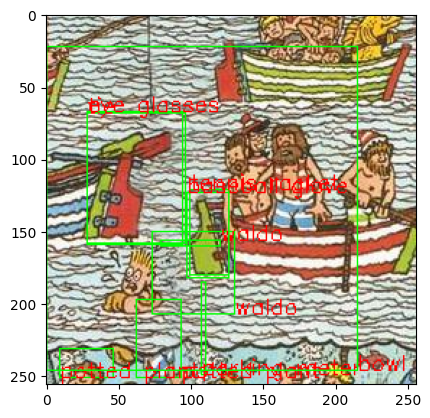

In [44]:
plt.imshow(imgGraph)
plt.show()